In [ ]:
import pygame
import random
from time import sleep

WINDOW_WIDTH = 480
WINDOW_HEIGHT = 700

BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
GRAY = (150, 150, 150)
RED = (255, 0, 0)

class Car:
    image_car = ['RacingCar01.png', 'RacingCar02.png', 'RacingCar03.png', 'RacingCar04.png', 'RacingCar05.png', \
                 'RacingCar06.png', 'RacingCar07.png', 'RacingCar08.png', 'RacingCar09.png', 'RacingCar10.png', \
                 'RacingCar11.png', 'RacingCar12.png', 'RacingCar13.png', 'RacingCar14.png', 'RacingCar15.png', \
                 'RacingCar16.png', 'RacingCar17.png', 'RacingCar18.png', 'RacingCar19.png', 'RacingCar20.png', ]
    def __init__(self, x=0, y=0, dx=0, dy=0):
        self.image = ""
        self.x = x
        self.y = y
        self.dx = dx
        self.dy = dy

    def load_image(self):
        self.image = pygame.image.load(random.choice(self.image_car))
        self.width = self.image.get_rect().size[0]
        self.height = self.image.get_rect().size[1]

    def draw_image(self):
        screen.blit(self.image, [self.x, self.y])

    def move_x(self):
        self.x += self.dx

    def move_y(self):
        self.u += self.dy

    def check_out_of_screen(self):
        if self.x+self.width > WINDOW_WIDTH or self.x < 0:
            self.x -= self.dx

    def check_crash(self, car):
        if (self.x+self.width > car.x) and (self.x < car.x+car.width) and (self.y < car.y+car.height) and (self.y+self.height > car.y):
            return True
        else:
            return False

def draw_main_menu():
    draw_x = (WINDOW_WIDTH/ 2) - 200
    draw_y = WINDOW_HEIGHT / 2
    image_intro = pygame.image.load('Pycar.png')
    screen.blit(image_intro, [draw_x, draw_y - 280])
    font_40 = pygame.font.SysFont("FixedSys", 40, True, False)
    font_30 = pygame.font.SysFont("FixedSys", 30, True, False)
    text_title = font_40.render("PyCar: Racing Car Game", True, BLACK)
    screen.blit(text_title, [draw_x, draw_y])
    text_score = font_40.render("Score: " + str(score), True, WHITE)
    screen.blit(text_score, [draw_x, draw_y + 70])
    text_start = font_30.render("Press Space Key to Start!", True, RED)
    screen.blit(text_start, [draw_x, draw_y + 140])
    pygame.display.flip()

def draw_score():
    font_30 = pygame.font.SysFont("FixedSys", 30, True, False)
    text_score = font_30.render("Score: "+str(score), True, BLACK)
    screen.blit(text_score, [15, 15])

def draw_lives():
    lives = 3
    lives_font = pygame.font.Font(None, 30)
    lives_pix = lives_font.render("lives: "+str(lives), True, BLACK)
    lives_pos = [50, 50]
    screen.blit(lives_pix, lives_pos)


if __name__ == '__main__':

    pygame.init()

    screen = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))
    pygame.display.set_caption("PyCar: Racing Car Game")
    clock = pygame.time.Clock()

    pygame.mixer.music.load('race.wav')
    sound_crash = pygame.mixer.Sound('crash.wav')
    sound_engine = pygame.mixer.Sound('engine.wav')


    player = Car(WINDOW_WIDTH / 2, WINDOW_HEIGHT - 150, 0, 0)
    player.load_image()

    cars = []
    car_count = 3
    for i in range(car_count):
        x = random.randrange(0, WINDOW_WIDTH-55)
        y = random.randrange(-150, -50)
        car = Car(x, y, 0, random.randint(5,10))
        car.load_image()
        cars.append(car)

    lanes = []
    lane_width = 10
    lane_height = 80
    lane_margin = 20
    lane_count = 10
    lane_x = (WINDOW_WIDTH - lane_width)/ 2
    lane_y = -10
    for i in range(lane_count):
        lanes.append([lane_x, lane_y])
        lane_y += lane_height + lane_margin

    score = 0
    crash = True
    game_on = True
    while game_on:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                game_on = False

            if crash:
                if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE:
                    crash = False
                    for i in range(car_count):
                        cars[i].x = random.randrange(0, WINDOW_WIDTH-cars[i].width)
                        cars[i].y = random.randrange(-150, -50)
                        cars[i].load_image()


                    player.load_image()
                    player.x = WINDOW_WIDTH / 2
                    player.dx = 0
                    score = 0
                    pygame.mouse.set_visible(False)
                    sound_engine.play()
                    sleep(5)
                    pygame.mixer.music.play(-1)

            if not crash:
                if event.type == pygame.KEYDOWN:
                    if event.key == pygame.K_RIGHT:
                        player.dx = 4
                    elif event.key == pygame.K_LEFT:
                        player.dx = -4

            if event.type == pygame.KEYUP:
                if event.key == pygame.K_LEFT:
                    player.dx = 0
                elif event.key == pygame.K_RIGHT:
                    player.dx = 0
        
                    
        screen.fill(GRAY)

        if not crash:
            for i in range(lane_count):
                pygame.draw.rect(screen, WHITE, [lanes[i][0], lanes[i][1], lane_width, lane_height])
                lanes[i][1] += 10
                if lanes[i][1] > WINDOW_HEIGHT:
                    lanes[i][1] = -40 - lane_height

            player.draw_image()
            player.move_x()
            player.check_out_of_screen()

            for i in range(car_count):
                cars[i].draw_image()
                cars[i].y += cars[i].dy
                if cars[i].y > WINDOW_HEIGHT:
                    score += 10
                    cars[i].x = random.randrange(0, WINDOW_WIDTH-cars[i].width)
                    cars[i].y = random.randrange(-150, -50)
                    cars[i].dy = random.randint(5,10)
                    cars[i].load_image()

            for i in range(car_count):
                if player.check_crash(cars[i]):
                    crash = True
                    car_crash = pygame.image.load('bom.png')
                    screen.blit(car_crash,((x-10),(y-100)))
                    pygame.mixer.music.stop()
                    sound_crash.play()
                    sleep(1)
                    pygame.mouse.set_visible(True)
                    break

                

            draw_score()
            draw_lives()
            pygame.display.flip()    
        else:
            draw_main_menu()

        clock.tick(60)

    pygame.quit()

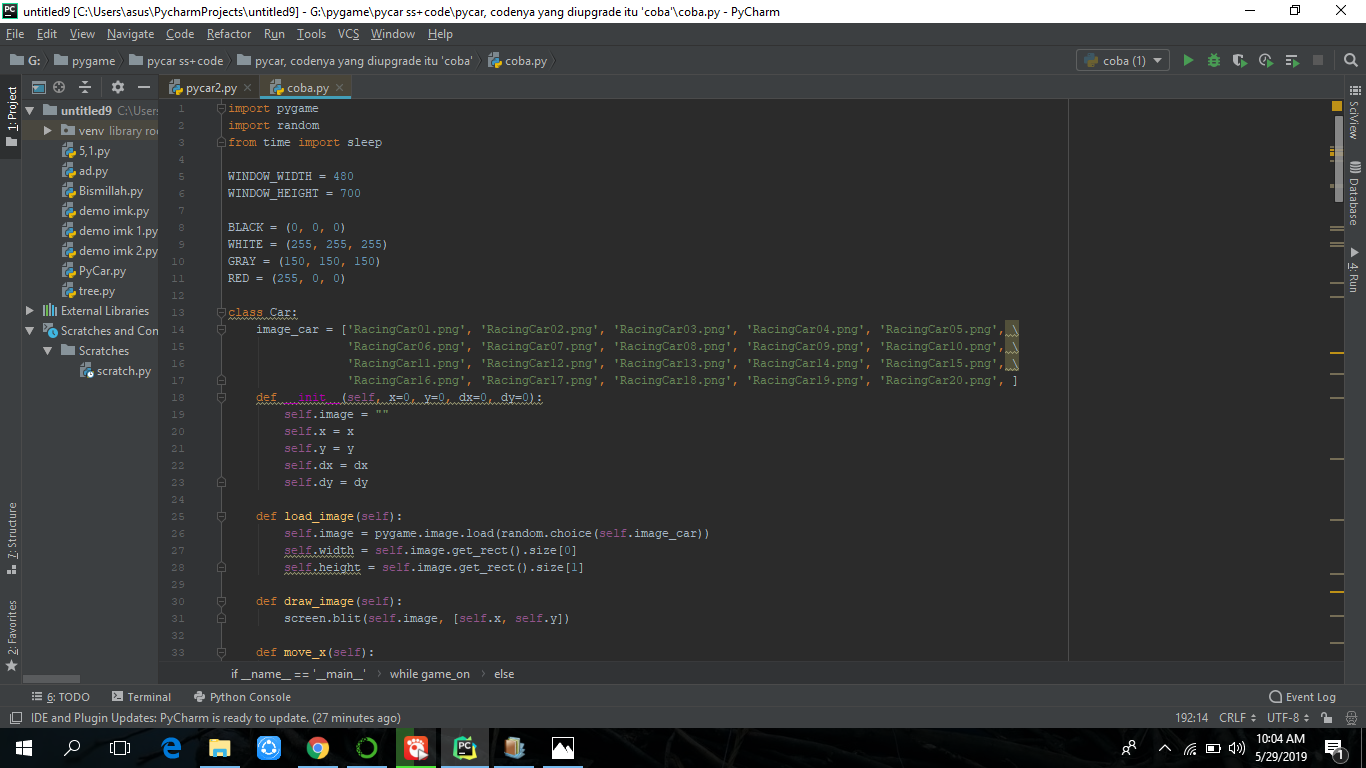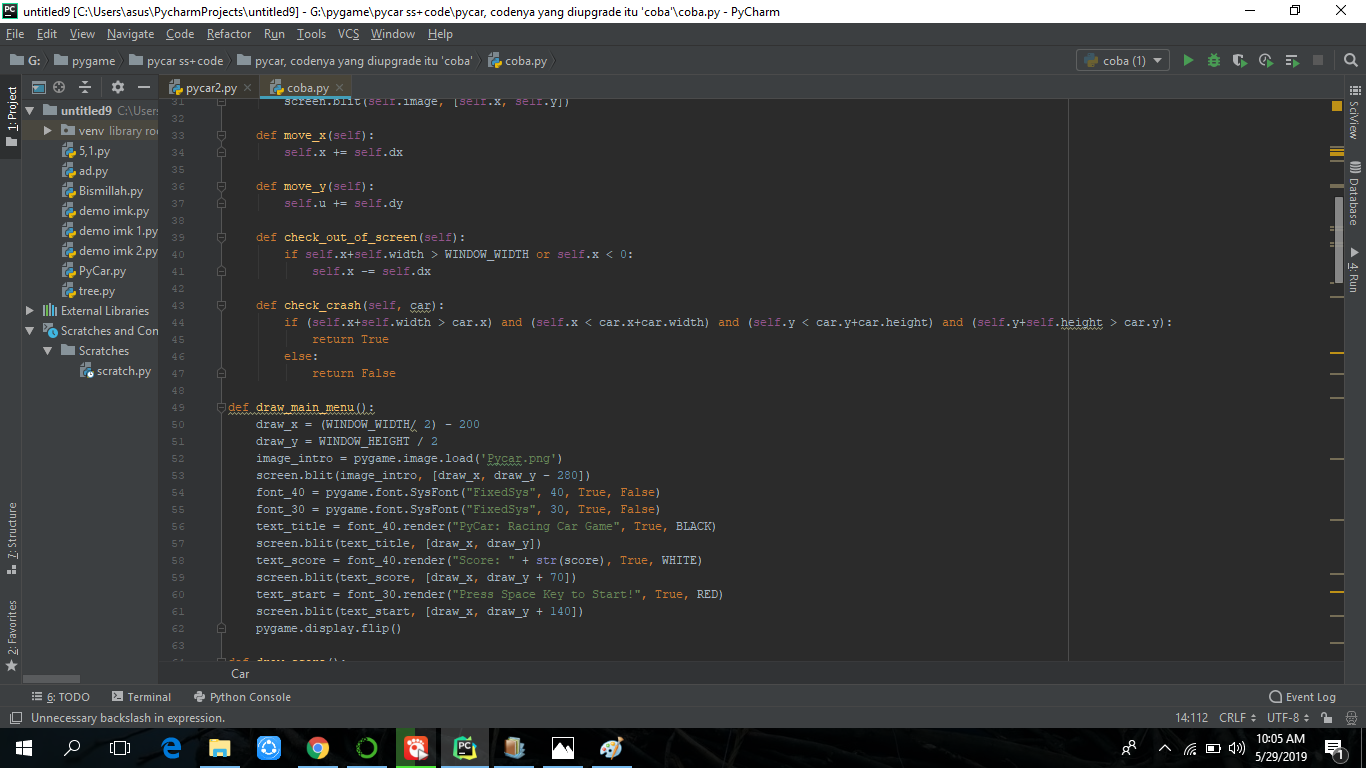
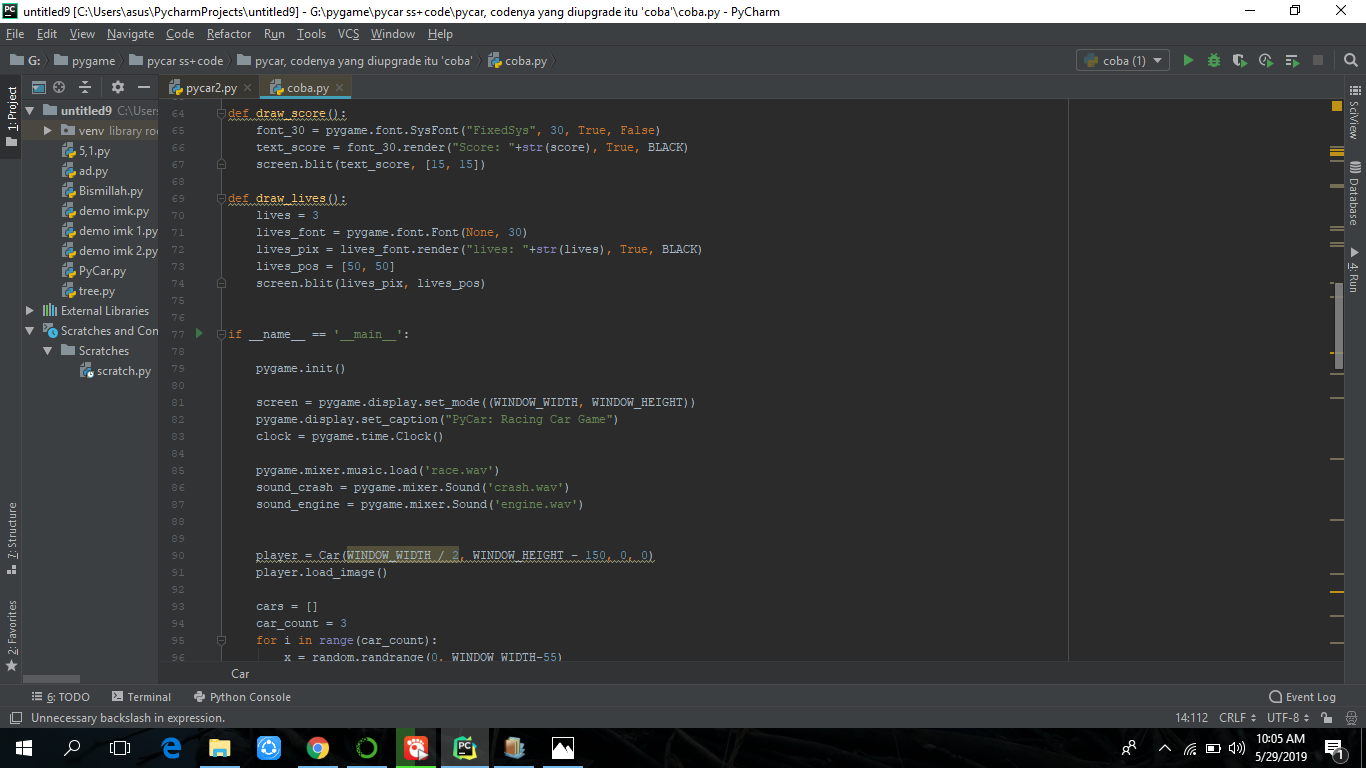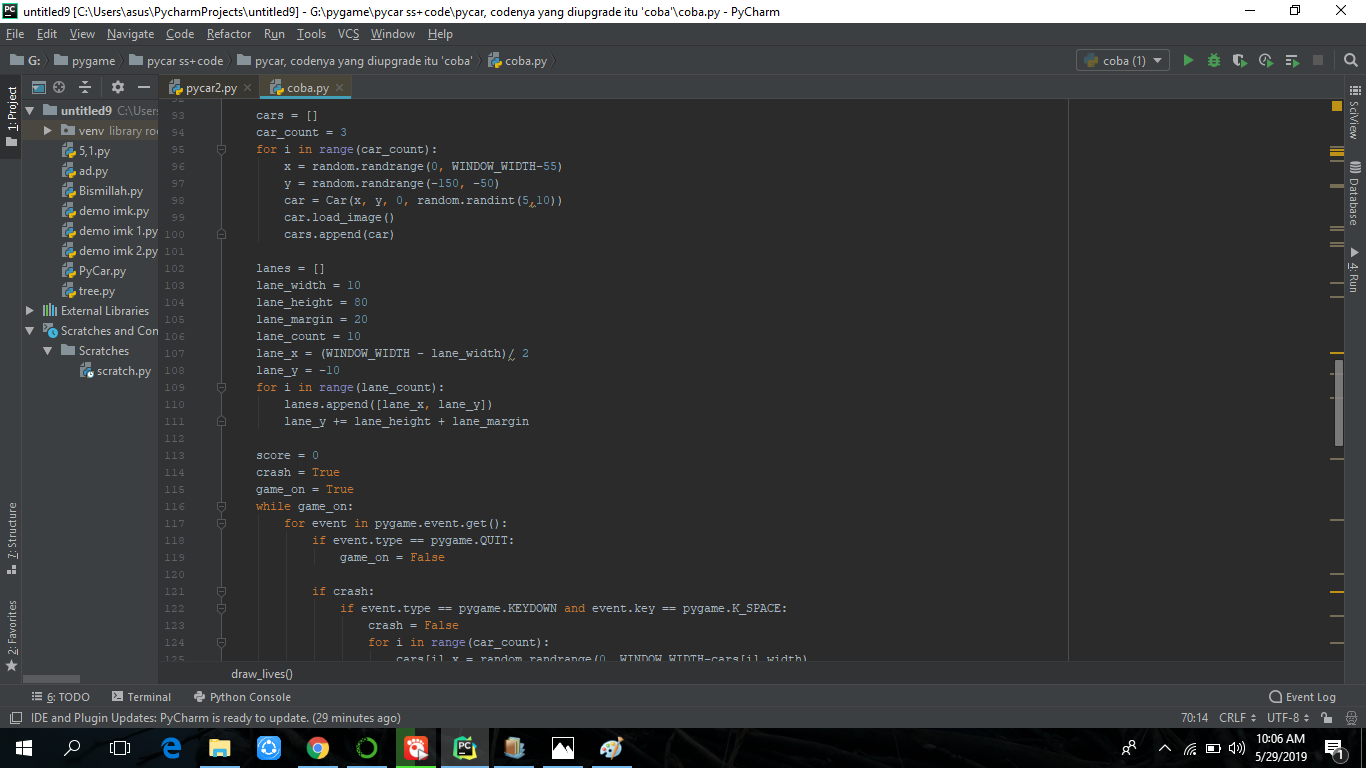
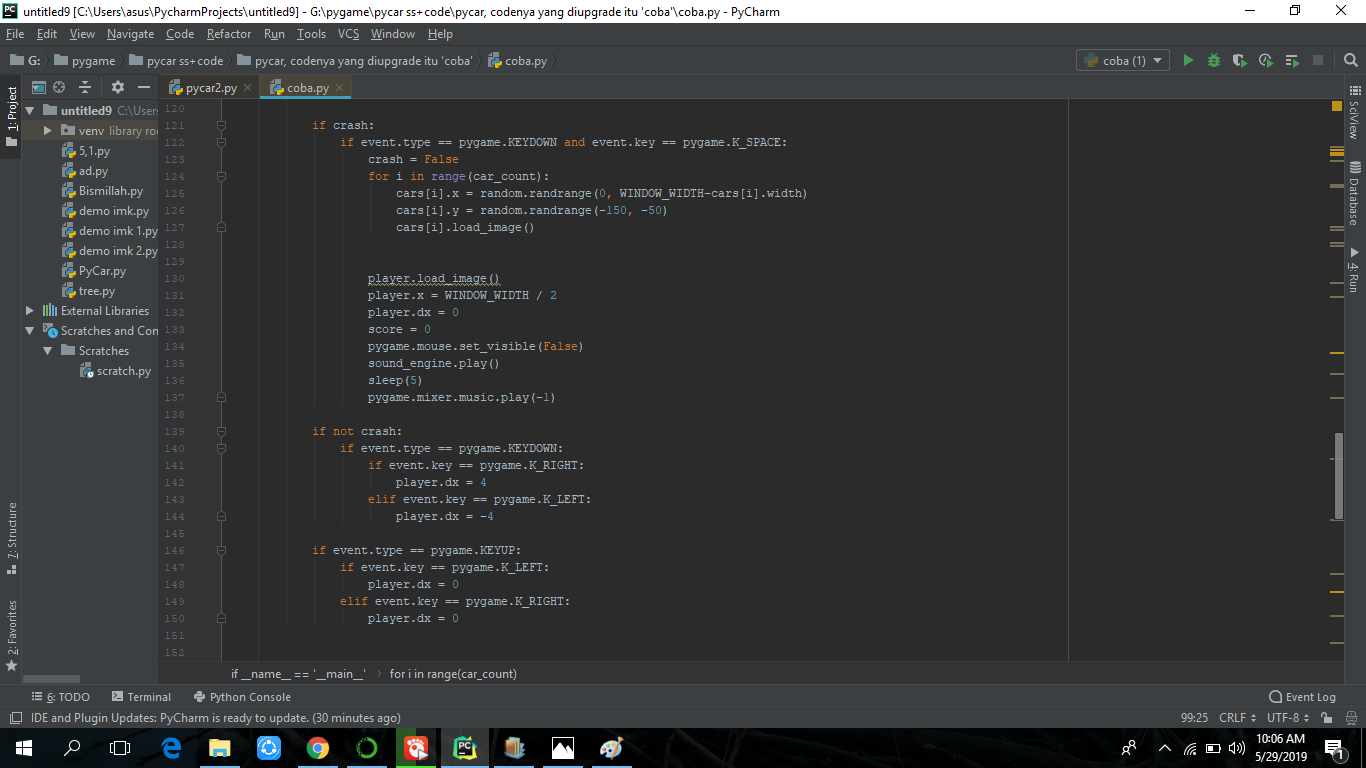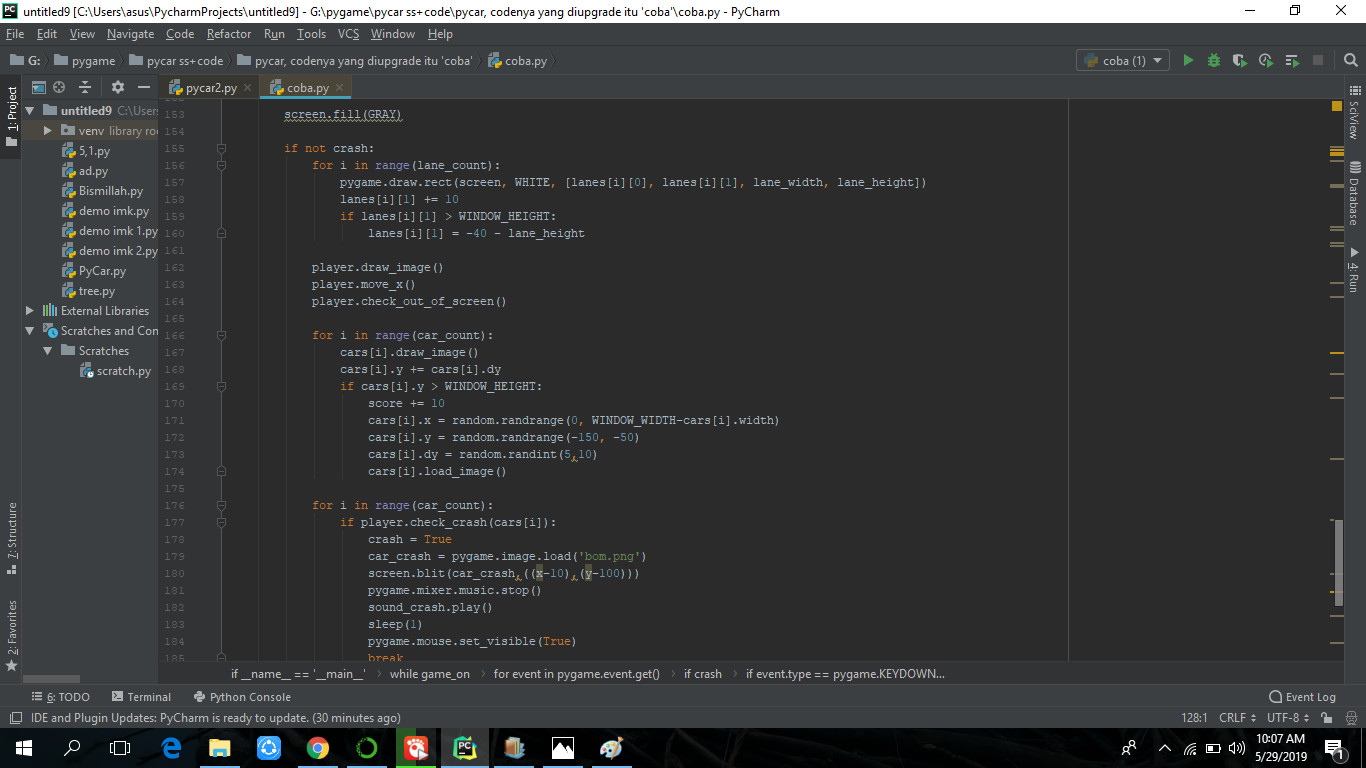
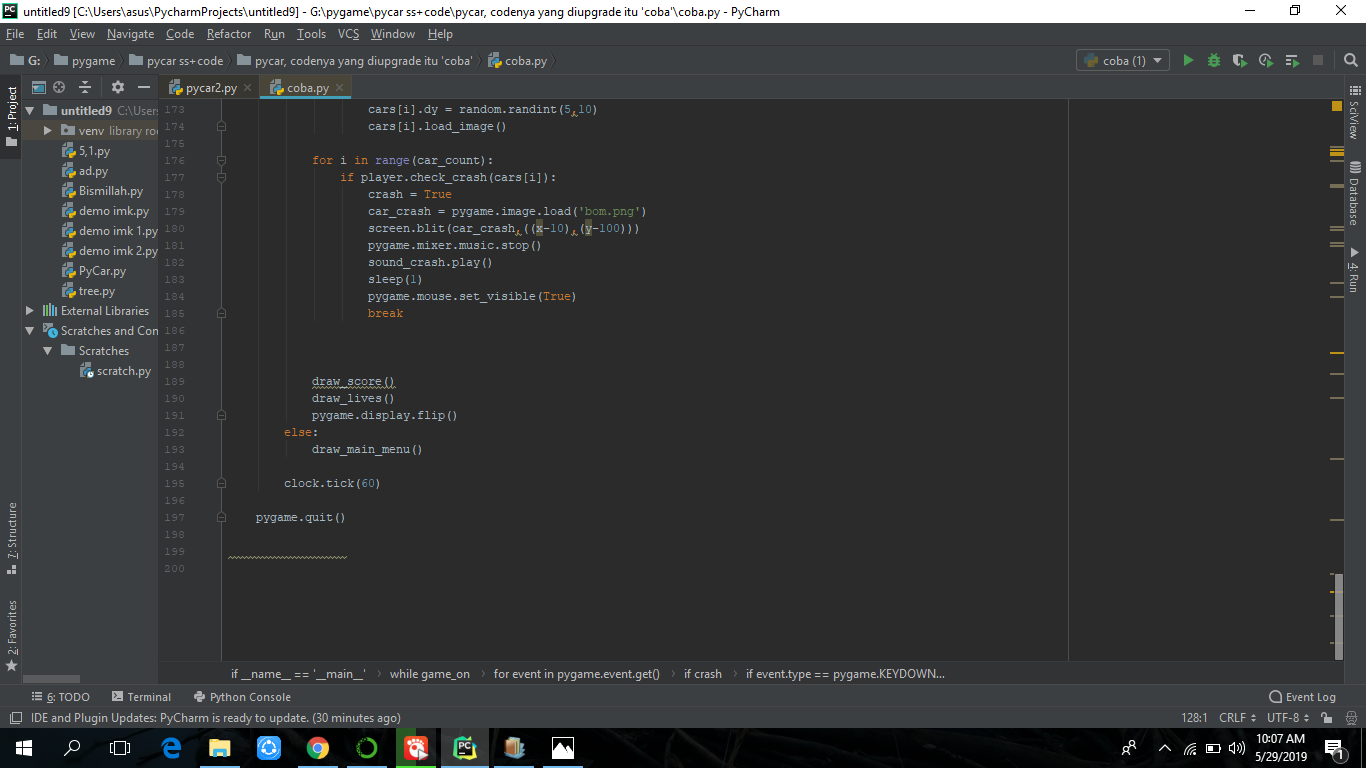
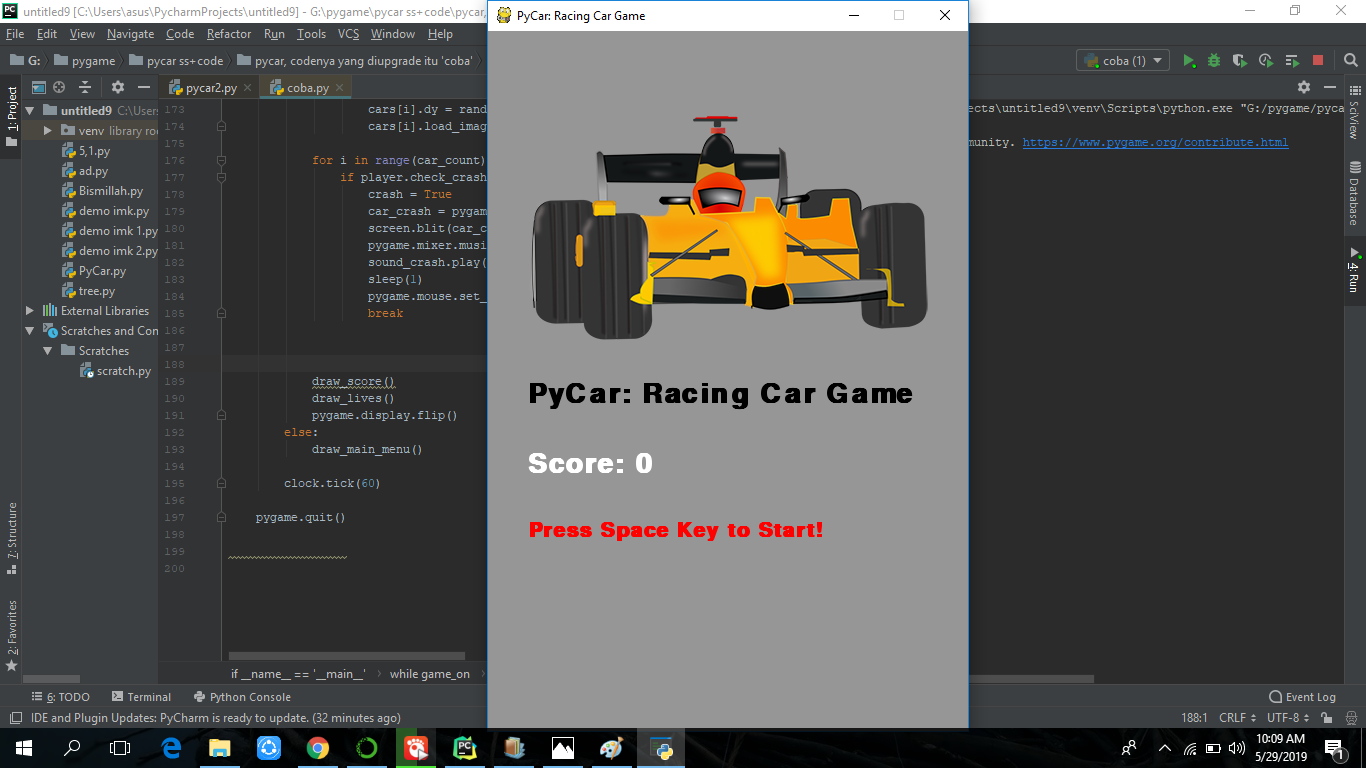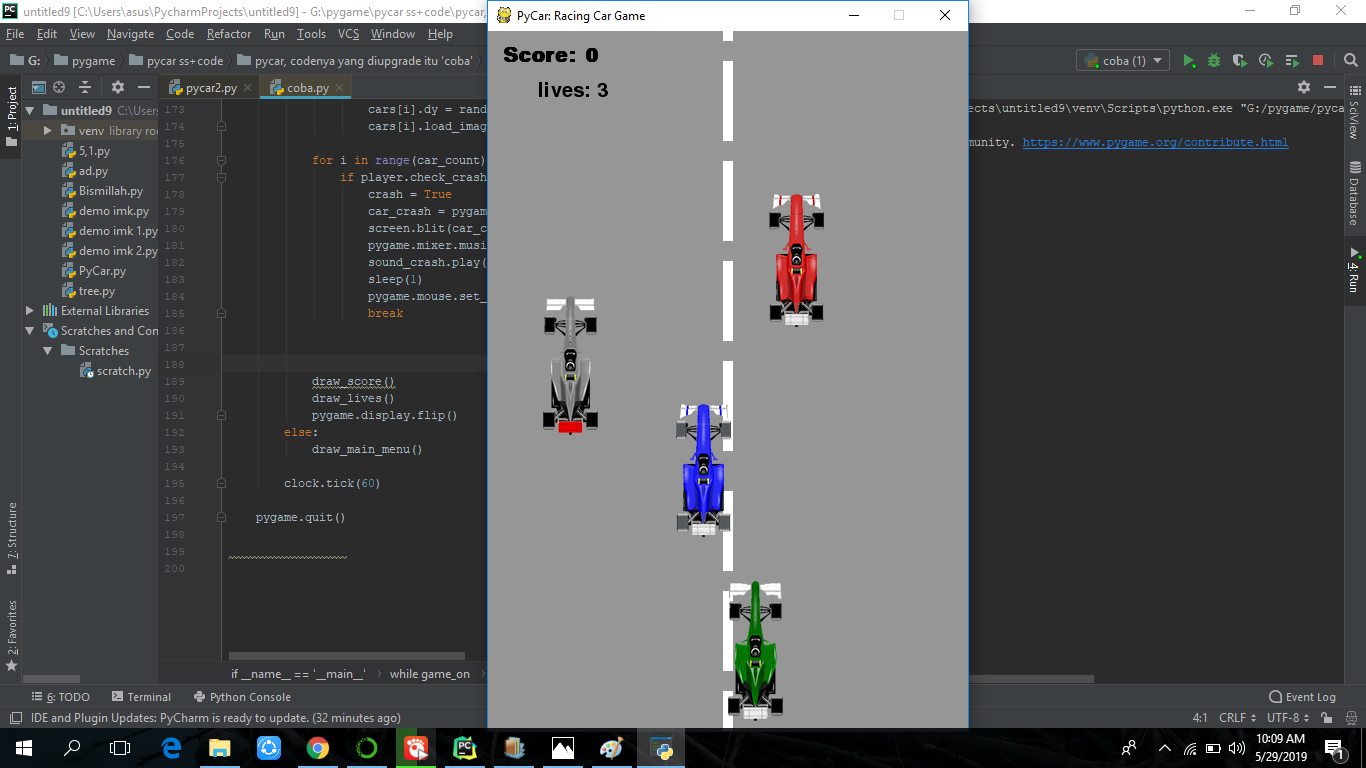


# PENGERTIAN PYGAME:
Pygame adalah seperangkat modul Python yang dirancang untuk membuat permainan. Pygame menambahkan fungsi di atas dengan sangat baik di SDL perpustakaan. Hal ini memungkinkan Anda untuk membuat sebuah game dengan fitur yang lengkap dan sebuah program multimedia dalam bahasa python. Pygame sangat portabel dan dapat berjalan pada hampir semua platform dan sistem operasi. 

# CARA INSTAL PYGAME:
Langkah 1 : Cek versi python kalian. 
Nah langkah yang pertama ini, kalian harus mengetahui terlebih dahulu versi python yang terinstall di PC kalian dulu ya…. Bisa dengan cara membuka IDLE python nya. Atau bisa juga di C:/pythonxx/python.exe.

Langkah 2 : Medownload atau mengunduh file instalasi pygame.
Setelah itu kalian buka browser kalian dan pergi ke pygame.org/download.shtml . nah terus, klik link. Atau lebih mudahnya, bisa klik link ini http://www.lfd.uci.edu~gohlke/pythonlibs/#pygame, Nah pilih file library pygame sesuai versi python kalian yang sudah kalian cek tadi pada langkah pertama tadi ya, Lalu download file yang sesuai versi python kalian ya… dan harus sesuai dengan versi python yang kalian punya.

Langkah 3 : extract file hasil download.
Nah setelah itu, silahkan cari file instalasi pygame hasil download nya tadi ya… setelah itu, ubah extensi “.whl” menjadi “.zip”. Setelah itu extract dengan cara klik kanan, lalu pilih “extract”. Sekarang buka folder “pygame-1.9.2.data” hasil dari ‘extract’ tadi. Lalu buka forder “Headers”. Setelah itu select semuanya. Atau tekan “ctrl+a” setelah itu klik kanan pada mouse lalu pilih “copy”. 

Langkah 4 : Paste file yang sudah di copy.
Nah setelah kalian salin file – file nya, Lalu selanjutnya silahkan kalian pergi ke drive “C”. lalu pilih folder python sesuai versi nya. Contoh “pythonXX” huruf XX ini menandakan versi python nya. Contoh “python34”. Silahkan masuk ke folder “pythonxx” nya.. lalu masuk ke folder “include”. Nah di folder ini silahkan buat folder baru dengan nama “pygame”. Lalu paste file yang sudah di copy tadi kedalam folder “pygame” ini.

Langkah 5 : copy paste folder pygame.
Setelah itu selesai, silahkan copy folder “pygame” dan “pygame-1.9.2.data” hasil extract tadi ya. INGATT!!! Folder ”pygame” yang di copy adalah folder hasil extract nya ya.. bukan folder yang kita buat tadi. Lalu silahkan masuk ke dalam drive “C” lalu masuk ke folder “pythonxx”. Setelah itu masuk ke folder “Lib”. Lalu masuk ke folder “site-packages”. Nah silahkan paste di dalam folder “site-packages” ini ya. 

Langkah 6 : Finsih dan pengecekan.
Nah sekarang sudah selesai proses nya… namun, untuk memastikan pygame nya sudah terinstall atau belum, sekarang buka IDLE nya.. dan coba ketikkan “import pygame”. Dan jika tidak error berarti tandanya sudah berhasil.

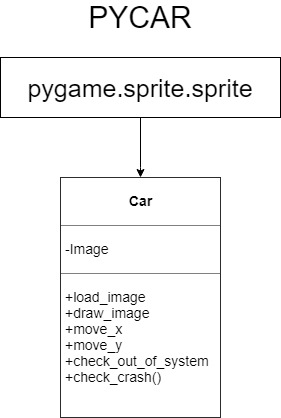

Global Variable:
* BLACK, WHITE, GRAY, RED
* window_height ukuran tinggi game
* window_width ukuran lebar game
* car_count untuk memunculkan jumlah mobil
* lane_widht untuk lebar garis jalan tengah
* lane_height untuk tinggi garis jalan tengah
* lane_margin untuk jarak antar margin
* lane_count untuk memunculkan jumlah garis
* lane_x untuk jarak antara garis dan mobil
* lane_y untuk jarak antara garis dan mobil

Method and Class Pygame:
* init()
* font.susfont
* font.font
* display.set_mode
* display.set_caption
* mixer.music.load
* mixer.mixer.sound
* time.clock
* event.get
* KEYDOWN
* K-SPACE
* quit
* mouse.set_visible
* mixer.music.play
* K_right
* K_left
* image.load

class and method for pycar:
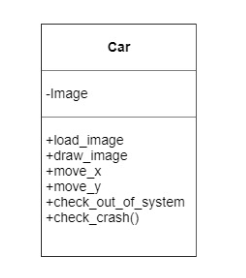

Class car, memiliki properti:
- image merupakan macam-macam mobil
- load_image merupakan bentuk permukaan dengan ukuran mobil
- draw_image merupakan bentuk gambar dari mobil
- move_x yaitu pemindahan posisi mobil
- move_y yaitu pemindahan posisi mobil
- check_out_of_system yaitu ukuran
- check_crash() untuk mengecek saat akan tabrakan

OBJECT DAN CLASS

Class adalah salah satu cara bagaimana kita membuat sebuah kode yang mempunyai behaviour tertentu dan lebih mudah dalam mengorganisasi berbagai fungsi dan state-nya. Dalam sebuah class kamu dapat menyimpan sebuah state tanpa harus membuat banyak state bila tidak menggunakan class.

In [ ]:
class Car:
    image_car = ['RacingCar01.png', 'RacingCar02.png', 'RacingCar03.png', 'RacingCar04.png', 'RacingCar05.png', \
                 'RacingCar06.png', 'RacingCar07.png', 'RacingCar08.png', 'RacingCar09.png', 'RacingCar10.png', \
                 'RacingCar11.png', 'RacingCar12.png', 'RacingCar13.png', 'RacingCar14.png', 'RacingCar15.png', \
                 'RacingCar16.png', 'RacingCar17.png', 'RacingCar18.png', 'RacingCar19.png', 'RacingCar20.png', ]
    def __init__(self, x=0, y=0, dx=0, dy=0):
        self.image = ""
        self.x = x
        self.y = y
        self.dx = dx
        self.dy = dy

    def load_image(self):
        self.image = pygame.image.load(random.choice(self.image_car))
        self.width = self.image.get_rect().size[0]
        self.height = self.image.get_rect().size[1]

    def draw_image(self):
        screen.blit(self.image, [self.x, self.y])

    def move_x(self):
        self.x += self.dx

    def move_y(self):
        self.u += self.dy

    def check_out_of_screen(self):
        if self.x+self.width > WINDOW_WIDTH or self.x < 0:
            self.x -= self.dx

    def check_crash(self, car):
        if (self.x+self.width > car.x) and (self.x < car.x+car.width) and (self.y < car.y+car.height) and (self.y+self.height > car.y):
            return True
        else:
            return False

Object merupakan bentuk nyata dari class, setiap object itu memiliki atribut dan method yang dimiliki oleh class nya

In [ ]:
draw_score()
            draw_lives()
            pygame.display.flip()    
        else:
            draw_main_menu()

        clock.tick(60)

    pygame.quit()